In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('first inten project.csv')

##1. Data Preprocessing (Check Null , Data Type , See The correct Form of the data)

In [5]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [7]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [11]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], format='mixed', errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

In [15]:
df.isna().sum()

Booking_ID                   0
number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead time                    0
market segment type          0
repeated                     0
P-C                          0
P-not-C                      0
average price                0
special requests             0
date of reservation         37
booking status               0
dtype: int64

In [17]:
df.dropna(subset=['date of reservation'], inplace=True)
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [19]:
df_categorical = df.select_dtypes(include='object')
for col in df_categorical:
    print(f"\nUnique values for '{col}':")
    print(df[col].unique())


Unique values for 'Booking_ID':
['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']

Unique values for 'type of meal':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Unique values for 'room type':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values for 'market segment type':
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

Unique values for 'booking status':
['Not_Canceled' 'Canceled']


In [21]:
df['booking status'].value_counts()

booking status
Not_Canceled    24366
Canceled        11882
Name: count, dtype: int64

## 2. Check And Handel The Outliers if we drop outliers the total of amout of outliers to be dropped in 50% of the data then the other solution to fill outliers with median and use robust scaling

In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Step 1: Replace outliers with median
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

In [26]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,2.0,0.0,2.0,5.0,Meal Plan 1,0.0,Room_Type 1,224.0,Offline,0.0,0.0,0.0,88.00,0.0,2015-10-02,Not_Canceled
1,INN00002,2.0,0.0,1.0,3.0,Not Selected,0.0,Room_Type 1,5.0,Online,0.0,0.0,0.0,106.68,1.0,2018-11-06,Not_Canceled
2,INN00003,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,1.0,Online,0.0,0.0,0.0,50.00,0.0,2018-02-28,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,Online,0.0,0.0,0.0,100.00,1.0,2017-05-20,Canceled
4,INN00005,2.0,0.0,1.0,2.0,Not Selected,0.0,Room_Type 1,48.0,Online,0.0,0.0,0.0,77.00,0.0,2018-04-11,Canceled


In [28]:
df.drop(columns=['Booking_ID','date of reservation'],axis=1,inplace=True)

In [30]:
df.reset_index(drop=True,inplace=True)

In [32]:
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,2.0,0.0,2.0,5.0,Meal Plan 1,0.0,Room_Type 1,224.0,Offline,0.0,0.0,0.0,88.00,0.0,Not_Canceled
1,2.0,0.0,1.0,3.0,Not Selected,0.0,Room_Type 1,5.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,1.0,Online,0.0,0.0,0.0,50.00,0.0,Canceled
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,Online,0.0,0.0,0.0,100.00,1.0,Canceled
4,2.0,0.0,1.0,2.0,Not Selected,0.0,Room_Type 1,48.0,Online,0.0,0.0,0.0,77.00,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,57.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled
36244,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,34.0,Online,0.0,0.0,0.0,107.55,1.0,Not_Canceled
36245,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 4,83.0,Online,0.0,0.0,0.0,105.61,1.0,Not_Canceled
36246,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,121.0,Offline,0.0,0.0,0.0,96.90,1.0,Not_Canceled


##3. Transformation For The Categorical Data

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['booking status'] = le.fit_transform(df['booking status'])

display(df.head())

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,2.0,0.0,2.0,5.0,Meal Plan 1,0.0,Room_Type 1,224.0,Offline,0.0,0.0,0.0,88.00,0.0,1
1,2.0,0.0,1.0,3.0,Not Selected,0.0,Room_Type 1,5.0,Online,0.0,0.0,0.0,106.68,1.0,1
2,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,1.0,Online,0.0,0.0,0.0,50.00,0.0,0
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,Online,0.0,0.0,0.0,100.00,1.0,0
4,2.0,0.0,1.0,2.0,Not Selected,0.0,Room_Type 1,48.0,Online,0.0,0.0,0.0,77.00,0.0,0


##4. Train Test Split

In [38]:
target = 'booking status'

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


## 5. Feature Engineering ( Feature Selection , Feature Extraction)

In [43]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X_train_transformed, y_train)

model = SelectFromModel(rf_selector, prefit=True, threshold='median')
X_train_selected = model.transform(X_train_transformed)
X_test_selected = model.transform(X_test_transformed)

print("Shape after Random Forest feature selection:", X_train_selected.shape)


Shape after Random Forest feature selection: (28998, 14)


In [45]:
pca = PCA(n_components=0.95)
X_train_final = pca.fit_transform(X_train_selected)
X_test_final = pca.transform(X_test_selected)

print("Final shape after RF + PCA:", X_train_final.shape)


Final shape after RF + PCA: (28998, 9)


##6. Modeling And Accuracy Calculation

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2369
           1       0.88      0.90      0.89      4881

    accuracy                           0.85      7250
   macro avg       0.84      0.83      0.83      7250
weighted avg       0.85      0.85      0.85      7250



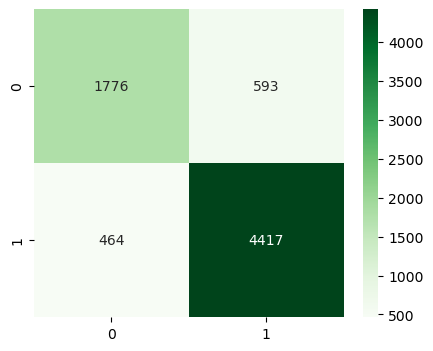

In [48]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_final, y_train)

y_predd = clf.predict(X_test_final)
print(classification_report(y_test, y_predd))
cm_rf = confusion_matrix(y_test, y_predd)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Red')
plt.show()


              precision    recall  f1-score   support

           0       0.75      0.61      0.67      2369
           1       0.83      0.90      0.86      4881

    accuracy                           0.80      7250
   macro avg       0.79      0.75      0.77      7250
weighted avg       0.80      0.80      0.80      7250



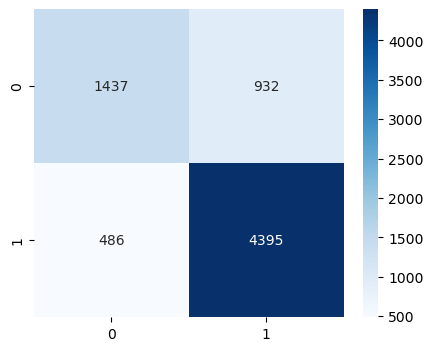

In [58]:
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train_final, y_train)

y_pred = clf.predict(X_test_final)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2369
           1       0.88      0.91      0.89      4881

    accuracy                           0.86      7250
   macro avg       0.84      0.83      0.83      7250
weighted avg       0.85      0.86      0.85      7250



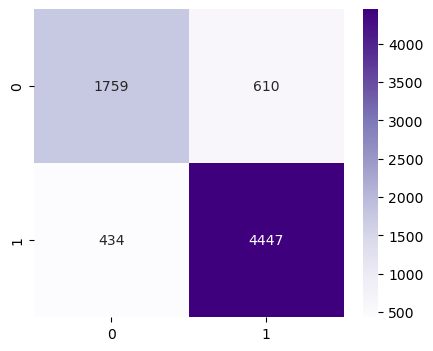

In [50]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                    param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_train_final, y_train)

best_model = grid.best_estimator_
y_preddd = best_model.predict(X_test_final)
print(classification_report(y_test, y_preddd))
cm_xgb = confusion_matrix(y_test, y_preddd)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples')
plt.show()